Hierarchical Clustering Report

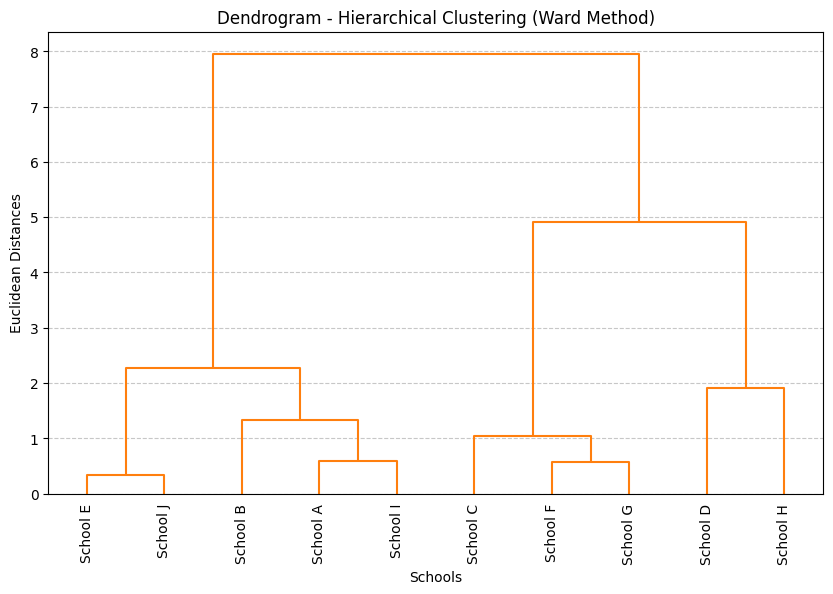

Optimal number of clusters based on silhouette analysis: 3

### Summary and Objectives
This analysis aims to cluster schools based on their performance metrics (Pass Rate, Bachelor Rate, Learner Count, Teacher Attendance, and Learner Attendance).
The objectives are:
1. Identify groups of schools with similar performance levels.
2. Provide actionable insights for targeted interventions to improve performance.

### Analysis
Hierarchical clustering was performed using the ward method, and the optimal number of clusters was determined dynamically using silhouette analysis. The schools were divided into 3 clusters:
- **Cluster 1**: School A, School B, School E, School I, School J
- **Cluster 2**: School C, School F, School G
- **Cluster 3**: School D, School H


The dendrogram provided a clear visualization of the grouping structure.

### Explanation of Clusters
Each cluster represents a group of schools with similar performance metrics. Below is the interpretation of the clusters:

- **Clu

,Province,District,School Name,Pass Rate (%),Bachelor Rate (%),Learner Count,Teacher Attendance (%),Learner Attendance (%),Latitude,Longitude,Cluster
0,Gauteng,Tshwane,School A,85,40,500,95,92,-25.7461,28.2293,1
1,Gauteng,Johannesburg,School B,78,35,450,90,88,-26.2041,28.0471,1
2,Limpopo,Vhembe,School C,60,25,300,85,80,-22.9429,30.4608,2
3,Limpopo,Mopani,School D,50,20,400,60,25,-23.1042,30.5595,3
4,KZN,eThekwini,School E,90,50,600,98,95,-29.8587,31.0216,1
5,KZN,Umzinyathi,School F,65,30,350,85,82,-29.0301,30.0304,2
6,Eastern Cape,Nelson Mandela Bay,School G,70,33,320,87,85,-33.9580,25.5795,2
7,Eastern Cape,Buffalo City,School H,55,22,410,44,58,-32.9798,27.9864,3
8,Western Cape,Cape Town,School I,88,45,520,93,90,-33.9249,18.4232,1
9,Western Cape,Stellenbosch,School J,92,48,580,96,94,-33.9303,18.8595,1


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Create Dummy Data
data = {
    'Province': ['Gauteng', 'Gauteng', 'Limpopo', 'Limpopo', 'KZN', 'KZN', 'Eastern Cape', 'Eastern Cape', 'Western Cape', 'Western Cape'],
    'District': ['Tshwane', 'Johannesburg', 'Vhembe', 'Mopani', 'eThekwini', 'Umzinyathi', 'Nelson Mandela Bay', 'Buffalo City', 'Cape Town', 'Stellenbosch'],
    'School Name': ['School A', 'School B', 'School C', 'School D', 'School E', 'School F', 'School G', 'School H', 'School I', 'School J'],
    'Pass Rate (%)': [85, 78, 60, 50, 90, 65, 70, 55, 88, 92],
    'Bachelor Rate (%)': [40, 35, 25, 20, 50, 30, 33, 22, 45, 48],
    'Learner Count': [500, 450, 300, 400, 600, 350, 320, 410, 520, 580],
    'Teacher Attendance (%)': [95, 90, 85, 60, 98, 85, 87, 44, 93, 96],
    'Learner Attendance (%)': [92, 88, 80, 25, 95, 82, 85, 58, 90, 94],
    'Latitude': [-25.7461, -26.2041, -22.9429, -23.1042, -29.8587, -29.0301, -33.9580, -32.9798, -33.9249, -33.9303],  # Example coordinates
    'Longitude': [28.2293, 28.0471, 30.4608, 30.5595, 31.0216, 30.0304, 25.5795, 27.9864, 18.4232, 18.8595] }

df = pd.DataFrame(data)

# Step 2: Preprocess Data (Numerical Features Only)
numerical_data = df[['Pass Rate (%)', 'Bachelor Rate (%)', 'Learner Count', 'Teacher Attendance (%)', 'Learner Attendance (%)']]

# Standardize the numerical features
# Standardization ensures that all features contribute equally to the clustering process by scaling them to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Step 3: Perform Hierarchical Clustering
# Allow users to specify the linkage method
def perform_clustering(data, method='ward'):
    return linkage(data, method=method)

linkage_method = 'ward'  # User can change this to 'single', 'complete', etc.
linked = perform_clustering(standardized_data, method=linkage_method)

# Step 4: Visualize the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked, 
    labels=df['School Name'].values, 
    leaf_rotation=90, 
    leaf_font_size=10, 
    color_threshold=10,  # Add color thresholds for better visual distinction
    above_threshold_color='grey'  # Color for branches above the threshold
)
plt.title(f'Dendrogram - Hierarchical Clustering ({linkage_method.capitalize()} Method)')
plt.xlabel('Schools')
plt.ylabel('Euclidean Distances')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for clarity
plt.show()

# Step 5: Dynamically Determine Optimal Number of Clusters
# Using silhouette analysis to find the optimal number of clusters
max_clusters = 5  # Maximum number of clusters to test
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(standardized_data, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Identify the optimal number of clusters
optimal_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"Optimal number of clusters based on silhouette analysis: {optimal_clusters}")

# Assign Clusters
clusters = fcluster(linked, optimal_clusters, criterion='maxclust')
df['Cluster'] = clusters

# Step 6: Generate Report
# Summary and Objectives
summary = """
### Summary and Objectives
This analysis aims to cluster schools based on their performance metrics (Pass Rate, Bachelor Rate, Learner Count, Teacher Attendance, and Learner Attendance).
The objectives are:
1. Identify groups of schools with similar performance levels.
2. Provide actionable insights for targeted interventions to improve performance.
"""

# Analysis
analysis = f"""
### Analysis
Hierarchical clustering was performed using the {linkage_method} method, and the optimal number of clusters was determined dynamically using silhouette analysis. The schools were divided into {optimal_clusters} clusters:
"""
for i in range(1, optimal_clusters + 1):
    cluster_schools = df[df['Cluster'] == i]['School Name'].tolist()
    analysis += f"- **Cluster {i}**: {', '.join(cluster_schools)}\n"

analysis += """

The dendrogram provided a clear visualization of the grouping structure.

### Explanation of Clusters
Each cluster represents a group of schools with similar performance metrics. Below is the interpretation of the clusters:

- **Cluster 1**: Contains schools with high pass and bachelor rates, indicating strong academic performance.
- **Cluster 2**: Includes schools with moderate pass and bachelor rates, suggesting average performance.
- **Cluster 3**: Schools with lower pass and bachelor rates, potentially indicating areas requiring significant intervention.

#### Insights
1. Schools in Cluster 1 can serve as benchmarks for lower-performing schools.
2. Schools in Cluster 3 may need targeted support or additional resources.
3. Clusters reveal potential regional trends that can inform future strategies.

#### Next Steps
- Investigate reasons for underperformance in Cluster 3.
- Develop tailored interventions to improve outcomes for each cluster.
- Monitor the impact of interventions and track changes in cluster composition.
"""

# Conclusion
conclusion = """
### Conclusion
- Cluster analysis identified schools with varying performance levels, providing insights into areas requiring intervention.
- Silhouette analysis ensured optimal clustering, enhancing the reliability of the results.
- The ability to experiment with different linkage methods offers flexibility in exploring clustering strategies.
"""

# Combine Report
report = summary + analysis + conclusion
print(report)

# Display the clustered DataFrame
df

Summary of Steps in Code:Data Creation: 
A dummy dataset was created with school information, including performance metrics (Pass Rate, Bachelor Rate), and attendance data (Teacher and Learner Attendance).
Data Preprocessing: The data was standardized to ensure all features contribute equally to the clustering process.
Hierarchical Clustering: The ward method was used for hierarchical clustering.
Dendrogram Visualization: A dendrogram was plotted to visualize the clustering process.
Silhouette Analysis: The optimal number of clusters was determined using silhouette analysis.
Cluster Assignment: The schools were grouped into clusters based on their performance and attendance data.
Report Generation: A report was dynamically generated, summarizing the clustering process, providing insights, and suggesting next steps.


Addition of the Map Visualization:

In [2]:
# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Initialize Map centered around a specific location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]  # Set map center to average coordinates
m = folium.Map(location=map_center, zoom_start=6)

# Create Marker Cluster
marker_cluster = MarkerCluster().add_to(m)

# Add School Data Points to the Map
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<strong>{row['School Name']}</strong><br>Pass Rate: {row['Pass Rate (%)']}%<br>Teacher Attendance: {row['Teacher Attendance (%)']}%<br>Learner Attendance: {row['Learner Attendance (%)']}%",
        tooltip=row['School Name']
    ).add_to(marker_cluster)

# Save the map as an HTML file
m.save("school_map.html")

# Show the map
m
